Forecasting Procedure

1. Choose a Model.
2. Split data into train and test sets
3. Fit model on training set
4. Evaluate model on test set
5. Re-fit model on entire dataset
6. Forecast the future data

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r'C:\Users\nevishwakarma\Documents\Datasets\Data_Udemy\airline_passengers.csv', index_col=['Month'], parse_dates=True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df.index.freq = 'MS'

**Train Test Split**

In [5]:
len(df) - np.ceil(len(df) * 0.2)

115.0

In [6]:
train_data = df.iloc[:109]
test_data = df.iloc[108:]

**Fit the Model**

In [7]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [8]:
## Seasonal Period is 12 as there are 12 entries per year, and the season is yearly
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

C:\Users\nevishwakarma\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\nevishwakarma\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [9]:
test_predictions = fitted_model.forecast(36) # for forecasting 36 months in the future 

<AxesSubplot:xlabel='Month'>

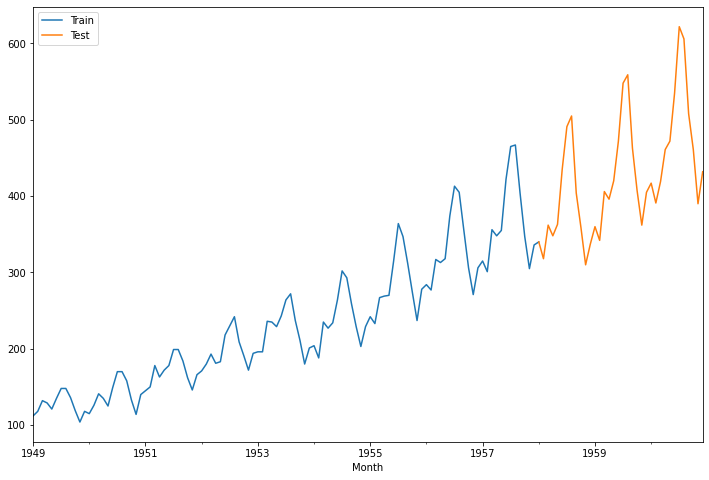

In [10]:
train_data['Thousands of Passengers'].plot(legend=True, label='Train', figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True, label='Test', figsize=(12,8))

<AxesSubplot:xlabel='Month'>

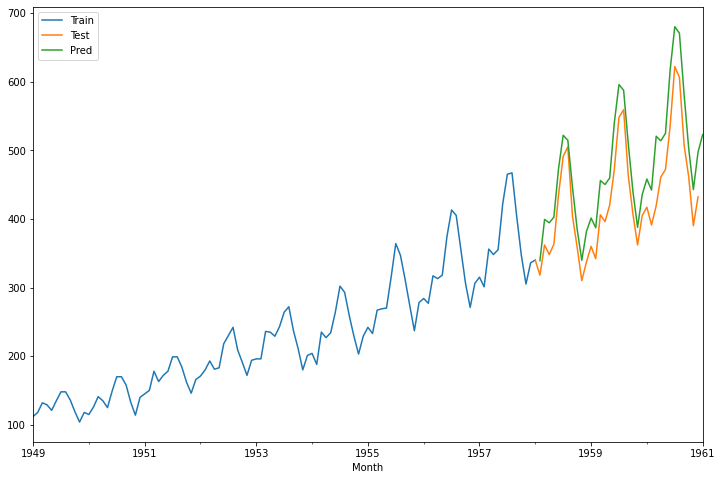

In [11]:
train_data['Thousands of Passengers'].plot(legend=True, label='Train', figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True, label='Test', figsize=(12,8))
test_predictions.plot(legend=True, label='Pred')

<AxesSubplot:xlabel='Month'>

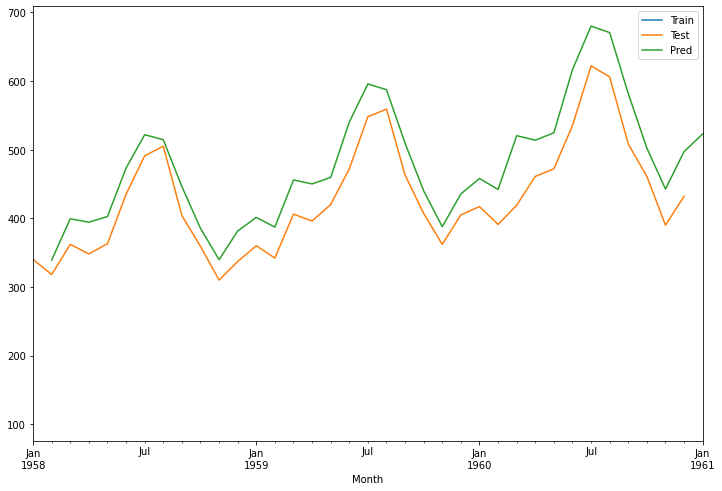

In [12]:
train_data['Thousands of Passengers'].plot(legend=True, label='Train', figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True, label='Test', figsize=(12,8))
test_predictions.plot(legend=True, label='Pred', xlim=['1958-01-01','1961-01-01'])

## **Evaluating the model's predictions**

**MAE (Mean Absolute Error) :** This is baiscally the mean of the absolute value of the difference of the predicted value and the real value.

### $MAE =   \frac{1}{n}\sum\limits_{i=1}^n \lvert{y_i - \hat{y_i}}\rvert$

But this will ignore small variation in error values so it will not alert us if the forecast was really off by a very few points. so, we use next metric.

**MSE (Mean Squared Error) :** This is basically the mean of the squared of the value of the difference of the predicted value and the real value. this will make even the small error to get noted.

### $MSE =   \frac{1}{n}\sum\limits_{i=1}^n (y_i - \hat{y_i})^2$

But this will also square the units. For eg. if we are calculate the error in the prediction of price, MSE would result in the value with the unit of dollar squared.
Therefore we usually take the nest metric.

**RMSE (Root Mean Squared Error) :** This is basically root of the mean of the squared of the value of the difference of the predicted value and the real value.

### $RMSE =   \sqrt{\frac{1}{n}\sum\limits_{i=1}^n (y_i - \hat{y_i})^2}$

**NOTE :** The unit of <tt>RMSE</tt> is the unit of our target value or the unit of the timeseries's value. For eg. <tt>RMSE</tt> for the time series of power consumtion (unit KWh) would have the unit KWh only

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [15]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [14]:
mean_absolute_error(test_data, test_predictions)

63.031188493774

In [16]:
mean_squared_error(test_data, test_predictions)

5614.265289857208

In [17]:
np.sqrt(mean_squared_error(test_data, test_predictions))

74.92840108968834

Since the RMSE is withing the one standatd deviation from the mean that means we're on the correct path.

## **Forecasting**

Here, we'll train the model with the whole dataset

In [19]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit();

In [20]:
forecast_predictions = final_model.forecast(36)

<AxesSubplot:xlabel='Month'>

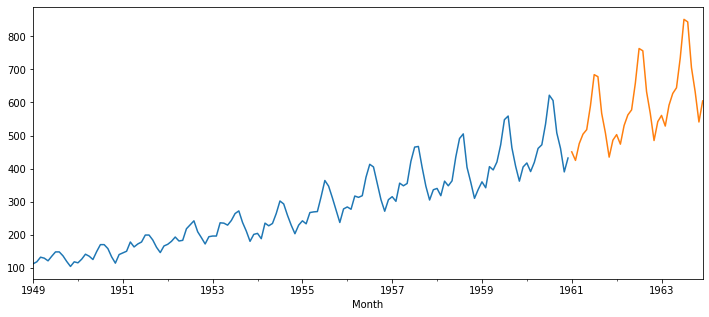

In [22]:
df['Thousands of Passengers'].plot(figsize=(12,5))
forecast_predictions.plot() 